# Busqueda por Costo

A continuacion se ejemplifica la busqueda por costo revisada en clase. Para ello se tiene un ejemplo de las ciudades del territorio Ecuatoriano y su distancia.

In [ ]:
# Busqueda por costo.

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None # Importante tener el costo de recorer el nodo
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node):
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)
    
    

In [ ]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

In [ ]:
# Implementacion del metodo de busqueda por costo
def search_costo_solucion(connections, init_state, solution):
    solved = False # Variable para almacenar el estado de la busqueda
    visited_nodes = [] # Nodos visitados
    frontier_nodes = [] # Nodos en busqueda o lista nodos o nodos por visitar

    init_node = Node(init_state) # Nodo inicial
    init_node.cost =0 # Agregar costo inicial
    frontier_nodes.append(init_node)
    while (not solved) and len(frontier_nodes) != 0:
        frontier_nodes = sorted(frontier_nodes, key=Compare) # Ordenar lista de nodos 
        node = frontier_nodes[0]
        visited_nodes.append(frontier_nodes.pop(0)) # Extraer nodo y añadirlo a visitados
        if node.data == solution:# Solucion encontrada
            solved = True
            return node
        else:
            node_data = node.data# Expandir nodos hijo (ciudades con conexion)
            child_list = []
            for achild in connections[node_data]: # Recorrera cada uno de los nodos hijos
                child = Node(achild)
                cost = connections[node_data][achild] # Obtener el costo del nodo
                child.cost = node.cost + cost # Agregamos el costo actual del nodo + el historial
                child_list.append(child)
                if not child.on_list(visited_nodes):
                    if child.on_list(frontier_nodes): # Si está en la lista lo sustituimos con el nuevo valor de coste si es menor
                        for n in frontier_nodes:
                            if n.equal(child) and n.cost > child.cost:
                                frontier_nodes.remove(n)
                                frontier_nodes.append(child)
                    else:
                        frontier_nodes.append(child)
            node.set_child(child_list)

if __name__ == "__main__":
    connections = {
        'Cuenca': {'Riobamba':190, 'Quito':280, 'Guayaquil':170},
        'Latacunga': {'Ambato':50, 'Quito':30},
        'Esmeraldas': {'Manta':80},
        'Manta': {'Guayaquil':60},
        'Quito': {'Riobamba':110, 'Latacunga':30, 'Cuenca':280, 'Guayaquil':190, 'Puyo':170},
        'Riobamba': {'Cuenca':190, 'Quito':110},
        'Ambato': {'Latacunga':50, 'Puyo':80, 'Guayaquil':230},
        'Puyo': {'Ambato':60, 'Quito':170},
        'Machala': {'Guayaquil':80},
        'Guayaquil': {'Machala':80, 'Ambato':230, 'Quito':190, 'Cuenca':170, 'Manta':60}
    }

    init_state = 'Guayaquil'
    solution = 'Puyo'
    solution_node = search_costo_solucion(connections, init_state, solution)
    # mostrar resultado
    result = []
    node = solution_node
    if node is not None: 
        while node.fathr is not None:
            result.append(node.data)
            node = node.fathr
        result.append(init_state)
        result.reverse() # Reverso el resultado (Solo para presentar)
        print(result)
        print("Costo total: %s" % str(solution_node.cost)) # Imprimir el costo total de llegar al nodo
    else:
        print("No hay solucion !!!!")

## Practica

Implementar un algoritmo que me permita dibujar las conexiones con los costos y los resultados del grafo.

Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Policia/UPC/Funcion Judicial, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas generando un arbol jerarquico.


Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.


Subir el cuaderno con la resolucion

Generar un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.


## Parte 1:Implementar un algoritmo que me permita dibujar las conexiones con los costos y los resultados del grafo.

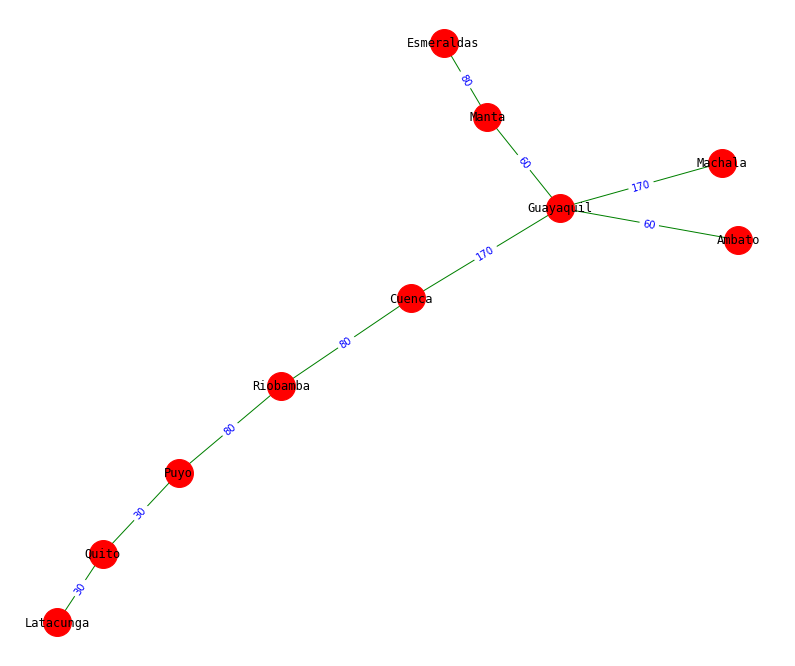

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
   
gf = nx.Graph()
gf.add_edge("Cuenca","Guayaquil", label = '170')
gf.add_edge("Latacunga","Quito", label = '30')
gf.add_edge("Esmeraldas","Manta", label = '80')
gf.add_edge("Manta","Guayaquil", label = '60')
gf.add_edge("Quito","Latacunga", label = '30')
gf.add_edge("Cuenca","Guayaquil", label = '170')
gf.add_edge("Riobamba","Cuenca", label = '80')
gf.add_edge("Puyo","Riobamba", label = '80')
gf.add_edge("Ambato","Guayaquil", label = '60')
gf.add_edge("Puyo","Quito", label = '30')
gf.add_edge("Machala","Guayaquil", label = '170')

etiquetas = [gf[u][v]['label'] for u,v in gf.edges()]
plt.figure(4,figsize=(14,12)) 
pos =nx.spring_layout(gf)
nx.draw_networkx_nodes(gf, pos, node_size=780, node_color='red')
nx.draw_networkx_edges(gf, pos, edge_color='Green') 
nx.draw_networkx_edge_labels(gf,pos,edge_labels={(u,v):gf[u][v]['label'] for u,v in gf.edges()} ,font_color='Blue')

nx.draw_networkx_labels(gf, pos, font_family='monospace',
        node_color="grey",
        edge_color="YELLOW",
        font_size=12) 
plt.axis('off')

plt.show()

### Parte 2:Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Policia/UPC/Funcion Judicial, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas generando un arbol jerarquico.

In [11]:
import matplotlib.pyplot as plt
import networkx as nx
import warnings
UPC = {
    
        'Mi_Caza': {'Ups_Syausi':8300,'Ups_Policia_comunitaria':1600,'Ups_Departamento':3100,'Ups_el_Salado':3800,},
        'Ups_Policia_comunitaria': {'Ups_las Americas':1300,'Ups_Cayambe_F':2300,'Ups_Cayambe_N':2000},
        'Ups_Cayambe_N':{'Upc_Bellabista':3000 ,'Ups_Parque_Las_Americas':3400},
        'Ups_Parque_Las_Americas':{ 'Upc_Tomebamba':4300,'Upc_Paraiso':3000,'Upc_El_vergel':2000},
        'Upc_El_vergel':{ 'Upc_Cochapamba':7900 },
        'Upc_Paraiso':{ 'Upc_El_Valle':6600},
        'Upc_Tomebamba': {'Upc_Via_Pacha':5700},
        'Upc_Bellabista':{ 'Upc_Totoracocha':3300,'Upc_Terminal':2600,'Upc_Miraflores':3300,'Upc_Policia':5700}       
       
}

g = nx.Graph(UPC)

for key, valor in UPC.items():
        for i in valor:
            g.add_edge(key,i)
plt.figure(4,figsize=(14,10)) 
nx.draw_networkx(g,font_color='y',
        font_family='monospace',
        node_color="green",
        edge_color="black",
        font_size=12,
        width=3, 
        with_labels=True, 
        node_size=1000) 
plt.show()

SyntaxError: invalid syntax (<ipython-input-11-1faf7fba56a0>, line 6)

### Parte 3:Realizar los calculos para obtener el factor de ramificacion, análisis del algoritmo en términos de completitud, optimalidad, complejidad temporal y complejidad espacial.

## Resolucion
**n=6**

**d=20**
 
**Calculo**

20/6=3,3

 ## Completitud
*Se concluye que el algoritmo  busca desde la raiz y la ruta de menor costo, hasta allar la solucion
 ## optimalidad
*Es optimo porque retorna la ruta con costo menor.
  
 ## Complejidad temporal

\begin{equation*}
O =
\frac{(b^{n})}{}
\end{equation*}

\begin{equation*}
O =
\frac{(3,3^{6})}{ } {= 1291.46}
\end{equation*}

  
 ## Complejidad espacial
 
\begin{equation*}
O =
\frac{(b {}*n)}{} { = 3.3 *6}
\end{equation*}


\begin{equation*}
O =
\frac{}{} { 19,8}
\end{equation*}

### Parte 3:Subir el cuaderno con la resolucion Generar de  un arbol de expansion del COVID-19 en el Ecuador y agregarle al metodo de costo para obtener la ruta de contagio.


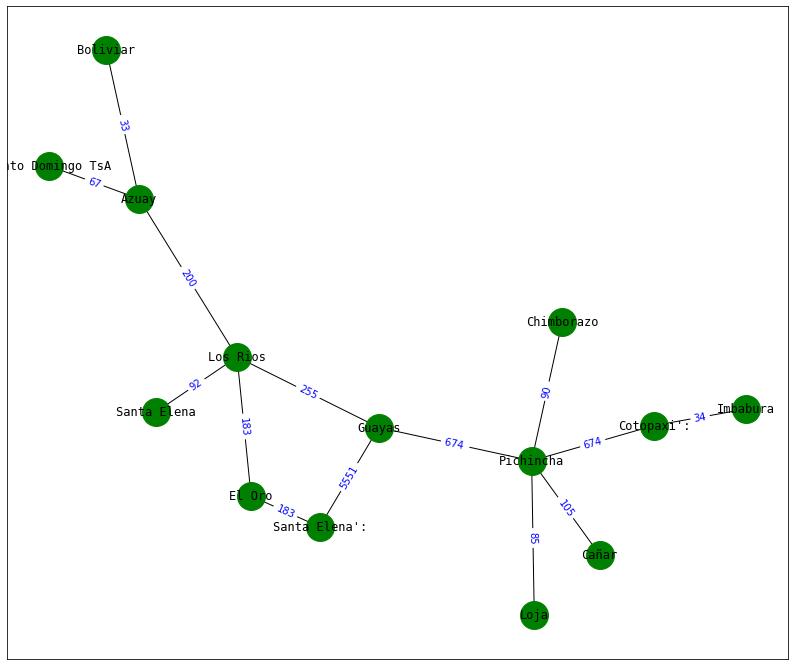

In [22]:
import matplotlib.pyplot as plt
import networkx as nx
import warnings
gr= nx.Graph()

gr.add_edge("Guayas", "Pichincha", weight = 2,label='674 ')
gr.add_edge("Guayas", "Los Rios", weight = 2,label ='255')
gr.add_edge("Los Rios", "El Oro", weight = 2,label ='183')
gr.add_edge("Los Rios", "Santa Elena", weight = 2,label ='92')
gr.add_edge("Los Rios", "Azuay", weight = 2,label ='200')
gr.add_edge("Pichincha", "Chimborazo", weight = 2,label ='90')
gr.add_edge("Pichincha", "Cañar", weight = 2, label ='105')
gr.add_edge("Pichincha", "Loja", weight = 2, label ='85')
gr.add_edge("Azuay", "Boliviar", weight = 2,label ='33')
gr.add_edge("Azuay", "Santo Domingo TsA", weight = 2,label ='67')
gr.add_edge("Cotopaxi':", "Imbabura", weight =2,label ='34')
gr.add_edge("Cotopaxi':", "Pichincha", weight =2,label ='674')
gr.add_edge("Santa Elena':", "Guayas", weight =2,label ='5551')
gr.add_edge("Santa Elena':", "El Oro", weight =2,label ='183')

weights = [gr[u][v]['weight'] for u,v in gr.edges()]
etiquetas = [gr[u][v]['label'] for u,v in gr.edges()]
plt.figure(4,figsize=(14,12)) 
pos =nx.spring_layout(gr)
nx.draw_networkx_nodes(gr, pos, node_size=780, node_color='green') 
nx.draw_networkx_edges(gr, pos, edge_color='Black') 
nx.draw_networkx_edge_labels(gr,pos,edge_labels={(u,v):gr[u][v]['label'] for u,v in gr.edges()} ,font_color='Blue')
nx.draw_networkx_labels(gr, pos, font_family='monospace',font_size=12) 

plt.show()

### CONCLUCION

Enconclusion el metodo de busqueda por costo es un metodo mucho mas efectivo en siertos casos que el aterior metodo